In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import image
import PIL
from PIL import Image
import os
import pathlib
from pathlib import Path

In [2]:
train_dir = pathlib.Path('./train/')
test_dir = pathlib.Path('./test')

In [3]:
train_img_count = len(list(train_dir.glob("*.jpg")))
train_img_count

240

In [4]:
test_img_count = len(list(test_dir.glob("*.jpg")))
test_img_count

60

In [5]:
#Standardizing jpg. Here,we choose 300X300
def imageResize(dir):
    files = os.listdir(dir) # list out all files in folder
    images = [] # save the full path of each image
    for file in files:
        if file.endswith('.jpg'): 
            image = os.path.join(dir,file)
            images.append(image)
    for image in images:
        name = os.path.basename(image) # image name
        image = Image.open(image) #/ PIL read images
        image = image.resize((300,300))
        print(name)
        image = image.convert('RGB')
        new_dir = dir + "_new/"
        image.save(new_dir + name)

In [6]:
imageResize("C:/Users/Ls7/Desktop/SA52/SA4108/Project2/test")

apple_77.jpg
apple_78.jpg
apple_79.jpg
apple_80.jpg
apple_81.jpg
apple_82.jpg
apple_83.jpg
apple_84.jpg
apple_85.jpg
apple_86.jpg
apple_87.jpg
apple_88.jpg
apple_89.jpg
apple_90.jpg
apple_91.jpg
apple_92.jpg
apple_93.jpg
apple_94.jpg
apple_95.jpg
banana_77.jpg
banana_78.jpg
banana_79.jpg
banana_80.jpg
banana_81.jpg
banana_82.jpg
banana_83.jpg
banana_84.jpg
banana_85.jpg
banana_86.jpg
banana_87.jpg
banana_88.jpg
banana_89.jpg
banana_90.jpg
banana_91.jpg
banana_92.jpg
banana_93.jpg
banana_94.jpg
mixed_21.jpg
mixed_22.jpg
mixed_23.jpg
mixed_24.jpg
mixed_25.jpg
orange_77.jpg
orange_78.jpg
orange_79.jpg
orange_80.jpg
orange_81.jpg
orange_82.jpg
orange_83.jpg
orange_84.jpg
orange_85.jpg
orange_86.jpg
orange_87.jpg
orange_89.jpg
orange_90.jpg
orange_91.jpg
orange_92.jpg
orange_93.jpg
orange_94.jpg
orange_95.jpg


In [7]:
imageResize("C:/Users/Ls7/Desktop/SA52/SA4108/Project2/train")

apple_1.jpg
apple_10.jpg
apple_11.jpg
apple_12.jpg
apple_13.jpg
apple_14.jpg
apple_15.jpg
apple_16.jpg
apple_17.jpg
apple_18.jpg
apple_19.jpg
apple_2.jpg
apple_20.jpg
apple_21.jpg
apple_22.jpg
apple_23.jpg
apple_24.jpg
apple_25.jpg
apple_26.jpg
apple_27.jpg
apple_28.jpg
apple_29.jpg
apple_3.jpg
apple_30.jpg
apple_31.jpg
apple_32.jpg
apple_33.jpg
apple_35.jpg
apple_36.jpg
apple_37.jpg
apple_38.jpg
apple_39.jpg


C:\Users\Ls7\anaconda3\envs\SA52\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


apple_4.jpg
apple_40.jpg
apple_41.jpg
apple_42.jpg
apple_43.jpg
apple_44.jpg
apple_45.jpg
apple_46.jpg
apple_47.jpg
apple_48.jpg
apple_49.jpg
apple_5.jpg
apple_50.jpg
apple_51.jpg
apple_52.jpg
apple_53.jpg
apple_54.jpg
apple_55.jpg
apple_56.jpg
apple_57.jpg
apple_58.jpg
apple_59.jpg
apple_6.jpg
apple_60.jpg
apple_61.jpg
apple_62.jpg
apple_63.jpg
apple_64.jpg
apple_65.jpg
apple_66.jpg
apple_67.jpg
apple_68.jpg
apple_69.jpg
apple_7.jpg
apple_70.jpg
apple_71.jpg
apple_72.jpg
apple_73.jpg
apple_74.jpg
apple_75.jpg
apple_76.jpg
apple_8.jpg
apple_9.jpg
banana_1.jpg
banana_10.jpg
banana_11.jpg
banana_12.jpg
banana_13.jpg
banana_14.jpg
banana_16.jpg
banana_17.jpg
banana_2.jpg
banana_20.jpg
banana_21.jpg
banana_22.jpg
banana_23.jpg
banana_24.jpg
banana_25.jpg
banana_26.jpg
banana_27.jpg
banana_28.jpg
banana_29.jpg
banana_3.jpg
banana_30.jpg
banana_31.jpg
banana_32.jpg
banana_33.jpg
banana_34.jpg
banana_35.jpg
banana_36.jpg
banana_37.jpg
banana_38.jpg
banana_39.jpg
banana_4.jpg
banana_40.jpg
ban

In [8]:
def get_dataset(filePath):
    
    img_loc = [] # save images
    label_list = [] # save labels
    appleCount, bananaCount, orangeCount, mixedCount = 0, 0, 0, 0

    for item in os.listdir(filePath):
        path = filePath + '/' + item
        img_loc.append(path)
        if 'apple' in item:
            label_list.append([1, 0, 0, 0])
            appleCount += 1
        elif 'banana' in item:
            label_list.append([0, 1, 0, 0])
            bananaCount += 1
        elif 'orange' in item:
            label_list.append([0, 0, 1, 0])
            orangeCount += 1
        elif 'mixed' in item:
            label_list.append([0, 0, 0, 1])
            mixedCount += 1
    print('Total apples: %d, bananas: %d, oranges: %d, mixed: %d' %(appleCount, 
                                                                    bananaCount,
                                                                    orangeCount,
                                                                    mixedCount))
    total_test = appleCount + bananaCount + orangeCount + mixedCount
    
    shuffled_indices = np.random.permutation(np.arange(len(label_list)))#generate the index of output
    
    x = np.array(img_loc)[shuffled_indices]
    y = np.array(label_list)[shuffled_indices]
    
    x_new = []
    for i in range(total_test):
        img = plt.imread(x[i]) #numpy.ndarray RGB (0-255)/ matplotlib.pyplot read images
        x_new.append(img)
    x_new = np.array(x_new)
    return x_new, y

In [9]:
(_x_train, _y_train) = get_dataset("C:/Users/Ls7/Desktop/SA52/SA4108/Project2/train_new")
(_x_test, _y_test) = get_dataset("C:/Users/Ls7/Desktop/SA52/SA4108/Project2/test_new")

Total apples: 75, bananas: 73, oranges: 72, mixed: 20
Total apples: 19, bananas: 18, oranges: 18, mixed: 5


In [10]:
print(_x_train.shape)
print(_y_train.shape)

print(_x_test.shape)
print(_y_test.shape)

(240, 300, 300, 3)
(240, 4)
(60, 300, 300, 3)
(60, 4)


In [11]:
_y_test.shape[0]

60

In [12]:
def preprocess(_x_train, _y_train, _x_test, _y_test):
    #eastablish the depth of images, color images' depth 3
    x_train = np.reshape(_x_train, (_x_train.shape[0], 300, 300, 3))
    x_test = np.reshape(_x_test, (_x_test.shape[0], 300, 300, 3))
    
    print(x_train.shape)
    print(x_train.dtype)
    
    x_train = x_train / 255
    x_test = x_test / 255
    
    print(_y_train.shape)
    print(_y_test.shape)
    
    y_train = _y_train
    y_test = _y_test
    
    return(x_train, y_train, x_test, y_test)

In [13]:
(x_train, y_train, x_test, y_test) = preprocess(_x_train, _y_train, _x_test, _y_test)

(240, 300, 300, 3)
uint8
(240, 4)
(60, 4)


In [14]:
#Runs 1
def run_cnn(_x_train, _y_train, _x_test, _y_test):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3),
                        padding='same',
                        activation='relu', 
                        input_shape=(300, 300, 3)))

    model.add(tf.keras.layers.Conv2D(32, (4, 4),
                        padding='same',
                        activation='relu'))

    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.summary()

    epochs=10
    
    history = model.fit(_x_train, _y_train, 
    batch_size=64, epochs=10, verbose=1,
    validation_data=(_x_test, _y_test))

    score = model.evaluate(_x_test, _y_test)
    print("score =", score)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 300, 32)      16416     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 720000)            0         
_________________________________________________________________
dense (Dense)                (None, 4)                 2880004   
Total params: 2,897,316
Trainable params: 2,897,316
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
4/4 [==============================] - 20s 5s/step - loss: 45.8422 - accuracy: 0.2875 - val_loss: 41.

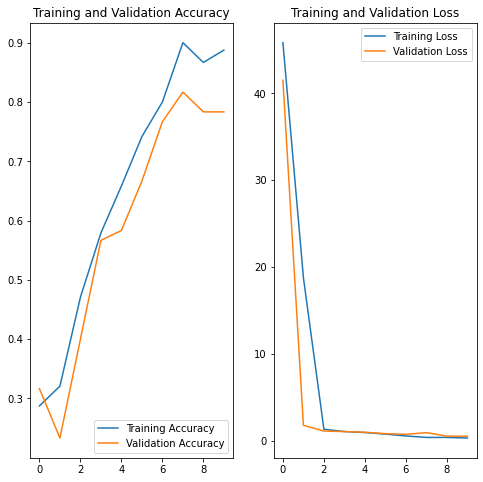

In [15]:
# initially, if the number of filter is high then lead the time consuming, 
# and large size of kernel also required long-time learning
model = run_cnn(x_train, y_train, x_test, y_test)

In [16]:
#Runs 2
def run_cnn1(_x_train, _y_train, _x_test, _y_test):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3),
                        padding='same',
                        activation='relu', 
                        input_shape=(300, 300, 3)))

    model.add(tf.keras.layers.Conv2D(32, (3, 3),
                        padding='same',
                        activation='relu'))

    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Dropout(0.25))    
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.summary()
    
    epochs=10

    history = model.fit(_x_train, _y_train, 
    batch_size=64, epochs=10, verbose=1,
    validation_data=(_x_test, _y_test))

    score = model.evaluate(_x_test, _y_test)
    print("score =", score)
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 300, 300, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 150, 150, 32)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 720000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               92160128  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

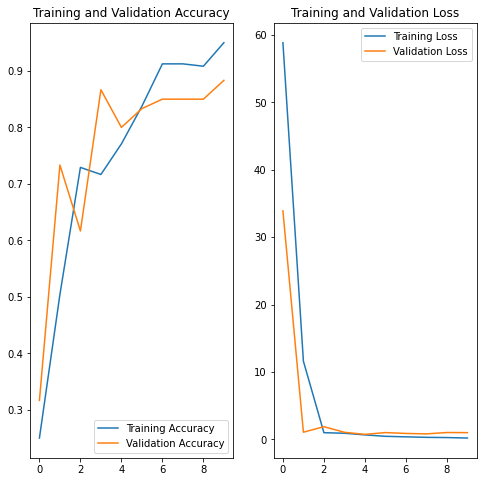

In [17]:
# add drop out layer to prevent the overfitting occurs,
# and decrease the size of kernel to improve learning time(each Epoch from 25s to 15s, by imporve 40%)
model = run_cnn1(x_train, y_train, x_test, y_test)

In [18]:
#Runs 3
def run_cnn2(_x_train, _y_train, _x_test, _y_test):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(16, (3, 3),
                        padding='same',
                        activation='relu', 
                        input_shape=(300, 300, 3)))

    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(32, (3, 3),
                        padding='same',
                        activation='relu'))

    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(64, (3, 3),
                        padding='same',
                        activation='relu'))    
    
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(128, activation='relu')) 
    
    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.summary()

    epochs=10
    history = model.fit(_x_train, _y_train, 
    batch_size=64, epochs=10, verbose=1,
    validation_data=(_x_test, _y_test))

    score = model.evaluate(_x_test, _y_test)
    print("score =", score)
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 87616)            

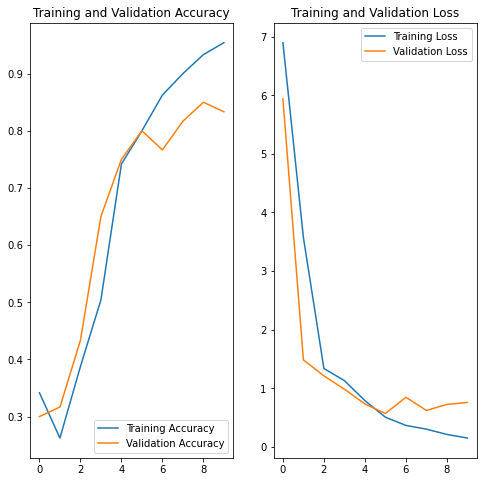

In [19]:
# The number of feature map increase progressively in each Convolutional layer and add additional Convolutional layer
# even without drop out layer, the accuracy is quite good
# However, the learning time improve significantly(each Epoch from 25s to 5s, by imporve 80%)
model = run_cnn2(x_train, y_train, x_test, y_test)

In [20]:
#Runs 4
def run_cnn3(_x_train, _y_train, _x_test, _y_test):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(16, (3, 3),
                        padding='same',
                        activation='relu', 
                        input_shape=(300, 300, 3)))

    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(32, (3, 3),
                        padding='same',
                        activation='relu'))

    model.add(tf.keras.layers.MaxPooling2D())

    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Conv2D(64, (3, 3),
                        padding='same',
                        activation='relu'))    
    
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Dropout(0.25))
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    
    model.add(tf.keras.layers.Dropout(0.4))
    
    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.summary()

    epochs = 10
    
    history = model.fit(_x_train, _y_train, 
    batch_size=10, epochs=10, verbose=1,
    validation_data=(_x_test, _y_test))

    score = model.evaluate(_x_test, _y_test)
    print("score =", score)
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 64)       

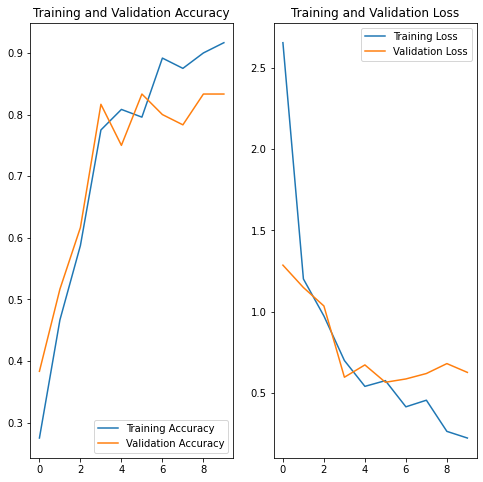

In [21]:
# based on the learning time significant improvement,
# try to decrease the batch size, and add some drop out filter
model = run_cnn3(x_train, y_train, x_test, y_test)

In [22]:
#Runs 5
def run_cnn4(_x_train, _y_train, _x_test, _y_test):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(16, (3, 3),
                        padding='same',
                        activation='relu', 
                        input_shape=(300, 300, 3)))

    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(32, (3, 3),
                        strides = 2,
                        padding='same',
                        activation='relu'))

    model.add(tf.keras.layers.MaxPooling2D())

    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Conv2D(64, (3, 3),
                        strides = 2,
                        padding='same',
                        activation='relu'))    
    
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Dropout(0.25))
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    
    model.add(tf.keras.layers.Dropout(0.4))
    
    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.summary()

    epochs = 10
    
    history = model.fit(_x_train, _y_train, 
    batch_size=10, epochs=10, verbose=1,
    validation_data=(_x_test, _y_test))

    score = model.evaluate(_x_test, _y_test)
    print("score =", score)
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 19, 19, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 9, 9, 64)         

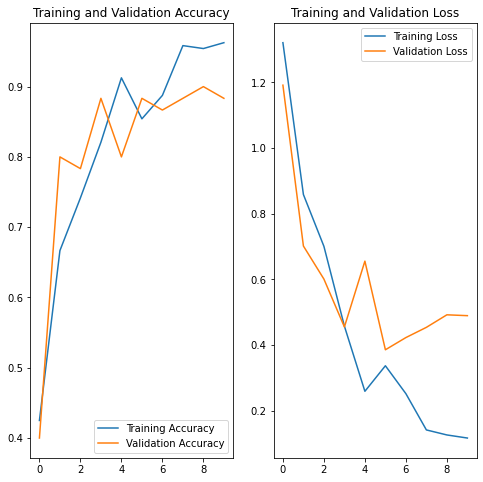

In [23]:
# increase the the strides from 1 to 2 for learning time improvement,
# and the accuracy is comparable
model = run_cnn4(x_train, y_train, x_test, y_test)

In [24]:
#Runs 6
def run_cnn5(_x_train, _y_train, _x_test, _y_test):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(16, (3, 3),
                        padding='same',
                        activation='relu', 
                        input_shape=(300, 300, 3)))

    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(32, (3, 3),
                        strides = 2,
                        padding='same',
                        activation='relu'))

    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(64, (3, 3),
                        strides = 2,
                        padding='same',
                        activation='relu'))    
    
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Dropout(0.3))
    
    model.add(tf.keras.layers.Conv2D(64, (3, 3),
                        strides = 2,
                        padding='same',
                        activation='relu'))    
    
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Dropout(0.3))
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    
    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.summary()

    epochs = 10
    history = model.fit(_x_train, _y_train, 
    batch_size=10, epochs=10, verbose=1,
    validation_data=(_x_test, _y_test))

    score = model.evaluate(_x_test, _y_test)
    print("score =", score)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 19, 19, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 9, 9, 64)         

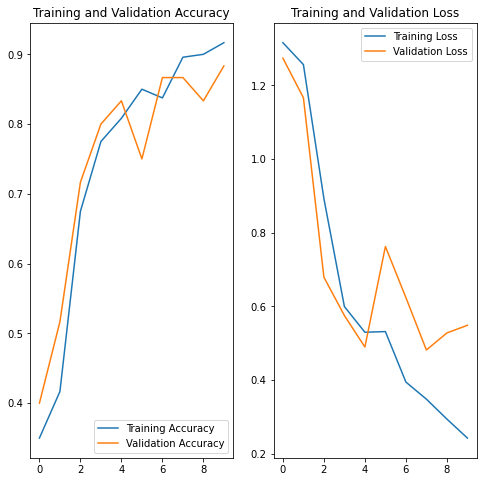

In [25]:
# based on it then optimize the parameter of drop out percentage
model = run_cnn5(x_train, y_train, x_test, y_test)

In [26]:
#Runs 7
def run_cnn6(_x_train, _y_train, _x_test, _y_test):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(16, (3, 3),
                        padding='same',
                        activation='relu', 
                        input_shape=(300, 300, 3)))

    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(32, (3, 3),
                        strides = 1,
                        padding='same',
                        activation='relu'))

    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(64, (3, 3),
                        strides = 2,
                        padding='same',
                        activation='relu'))    
    
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(192, (3, 3),
                        strides = 2,
                        padding='same',
                        activation='relu'))    
    
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(256, (3, 3),
                        strides = 2,
                        padding='same',
                        activation='relu'))    
    
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Dropout(0.4))
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    
    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.summary()

    epochs = 10
    history = model.fit(_x_train, _y_train, 
    batch_size=10, epochs=10, verbose=1,
    validation_data=(_x_test, _y_test))

    score = model.evaluate(_x_test, _y_test)
    print("score =", score)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 38, 38, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 192)      

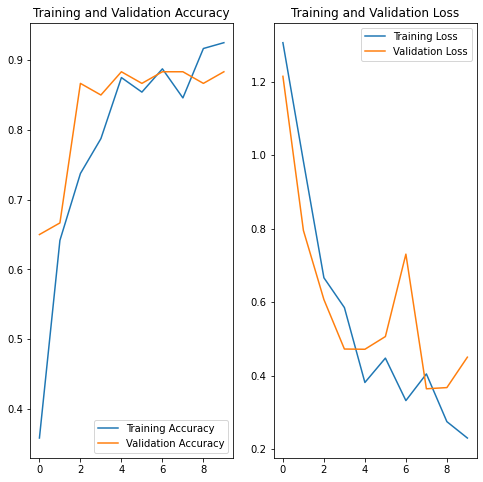

In [27]:
# continue to add additional Convolutional layer
model = run_cnn6(x_train, y_train, x_test, y_test)

In [28]:
#Runs 8
def run_cnn7(_x_train, _y_train, _x_test, _y_test):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(16, (3, 3),
                        padding='same',
                        activation='relu', 
                        input_shape=(300, 300, 3)))

    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(32, (3, 3),
                        strides = 1,
                        padding='same',
                        activation='relu'))

    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(64, (3, 3),
                        strides = 2,
                        padding='same',
                        activation='relu'))    
    
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(192, (3, 3),
                        strides = 2,
                        padding='same',
                        activation='relu'))    
    
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(256, (3, 3),
                        strides = 2,
                        padding='same',
                        activation='relu'))    
    
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    
    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.summary()

    epochs = 10
    history = model.fit(_x_train, _y_train, 
    batch_size=64, epochs=10, verbose=1,
    validation_data=(_x_test, _y_test))

    score = model.evaluate(_x_test, _y_test)
    print("score =", score)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 38, 38, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 192)      

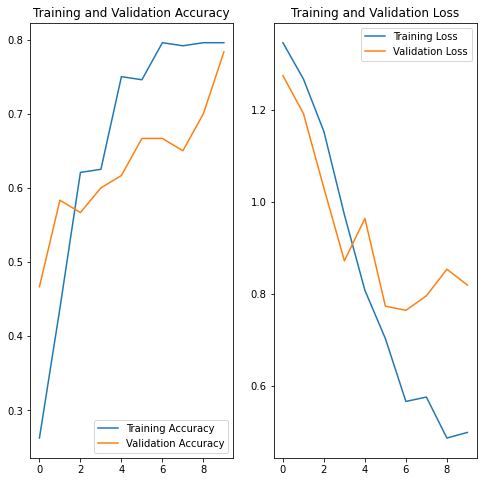

In [29]:
# based on it then optimize the parameter of drop out percentage and increase the batch size to check
model = run_cnn7(x_train, y_train, x_test, y_test)

In [30]:
#Runs 9
def run_cnn8(_x_train, _y_train, _x_test, _y_test):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(16, (3, 3),
                        padding='same',
                        activation='relu', 
                        input_shape=(300, 300, 3)))

    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(32, (3, 3),
                        strides = 1,
                        padding='same',
                        activation='relu'))

    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(64, (3, 3),
                        strides = 2,
                        padding='same',
                        activation='relu'))    
    
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(192, (3, 3),
                        strides = 2,
                        padding='same',
                        activation='relu'))    
    
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(256, (3, 3),
                        strides = 2,
                        padding='same',
                        activation='relu'))    
    
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    
    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.summary()

    epochs = 15
    history = model.fit(_x_train, _y_train, 
    batch_size=10, epochs=15, verbose=1,
    validation_data=(_x_test, _y_test))

    score = model.evaluate(_x_test, _y_test)
    print("score =", score)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 38, 38, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 10, 10, 192)      

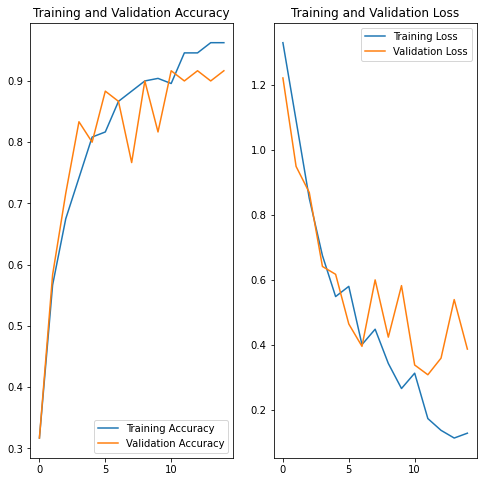

In [31]:
# increase the epoch for neural network to see the training data more times
model = run_cnn8(x_train, y_train, x_test, y_test)

In [32]:
#Runs 10
def run_cnn9(_x_train, _y_train, _x_test, _y_test):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(16, (3, 3),
                        padding='same',
                        activation='relu', 
                        input_shape=(300, 300, 3)))

    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(32, (3, 3),
                        strides = 1,
                        padding='same',
                        activation='relu'))

    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(64, (3, 3),
                        strides = 2,
                        padding='same',
                        activation='relu'))    
    
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(128, (3, 3),
                        strides = 2,
                        padding='same',
                        activation='relu'))    
    
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Dropout(0.5))
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    
    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.summary()

    epochs = 7 #use 7
    history = model.fit(_x_train, _y_train, 
    batch_size=10, epochs=7, verbose=1,
    validation_data=(_x_test, _y_test))

    score = model.evaluate(_x_test, _y_test)
    print("score =", score)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 38, 38, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 10, 10, 128)      

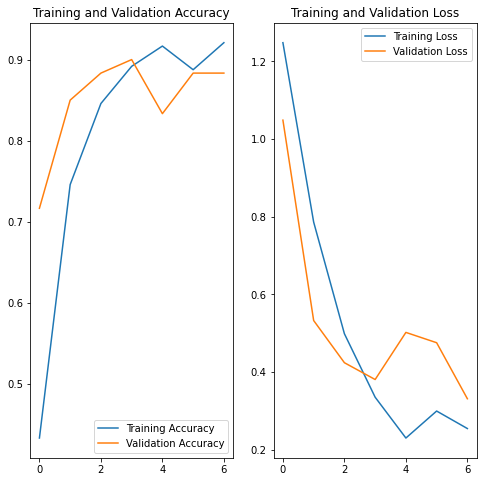

In [33]:
# modify the number of epochs, number of Convolutional layer and drop out percentage
model = run_cnn9(x_train, y_train, x_test, y_test)

In [34]:
#Runs 11
def run_cnn10(_x_train, _y_train, _x_test, _y_test):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(16, (3, 3),
                        padding='same',
                        activation='relu', 
                        input_shape=(300, 300, 3)))

    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(32, (3, 3),
                        strides = 1,
                        padding='same',
                        activation='relu'))

    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(64, (3, 3),
                        strides = 2,
                        padding='same',
                        activation='relu'))    
    
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(128, (3, 3),
                        strides = 2,
                        padding='same',
                        activation='relu'))    
    
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Conv2D(256, (3, 3),
                        strides = 2,
                        padding='same',
                        activation='relu'))    
    
    model.add(tf.keras.layers.MaxPooling2D())
    
    model.add(tf.keras.layers.Dropout(0.5))
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    
    model.add(tf.keras.layers.Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    model.summary()

    epochs = 12 #use 12
    history = model.fit(_x_train, _y_train, 
    batch_size=10, epochs=12, verbose=1,
    validation_data=(_x_test, _y_test))

    score = model.evaluate(_x_test, _y_test)
    print("score =", score)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 38, 38, 64)        18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 10, 10, 128)     

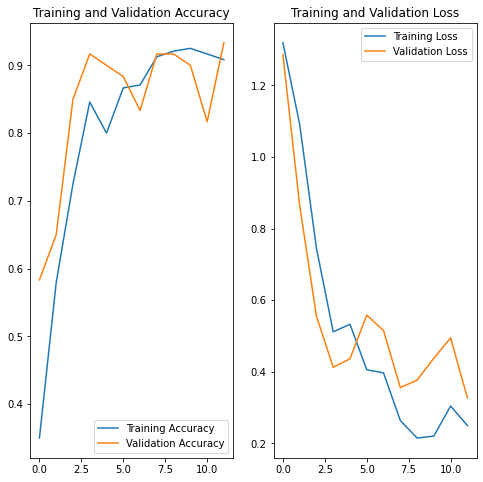

In [35]:
# continue to modify the number of epochs, number of Convolutional layer and drop out percentage
model = run_cnn10(x_train, y_train, x_test, y_test)